# 1ST STEP: Import Library

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy, scipy.stats
%matplotlib inline

# 2nd STEP: READING DATA

In [4]:
#we will read the data using the CSV input file
#also it is available on the web http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv
traindata = pd.read_csv('Advertising.csv')

In [5]:
traindata

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
traindata.shape

(200, 4)

In [7]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
traindata.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

# 3RD STEP: Exploratory Data Analysis

In [9]:
#checking the null values in each column
traindata.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [10]:
#checking the null values in each column
traindata.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

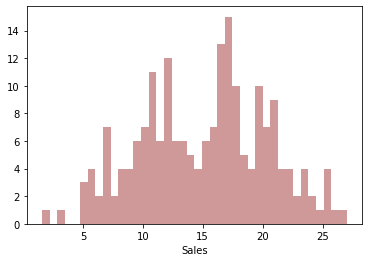

In [11]:
#using distribution plot to see the frequency of the sales values
sns.distplot(traindata['Sales'].dropna(),kde=False,color='darkred',bins=40)

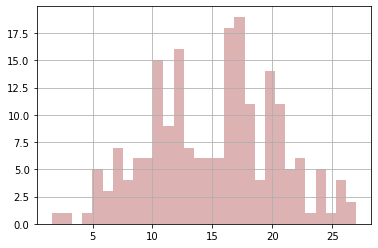

In [12]:
#using histogram to see the frequency of the sales values
traindata['Sales'].hist(bins=30,color='darkred',alpha=0.3)

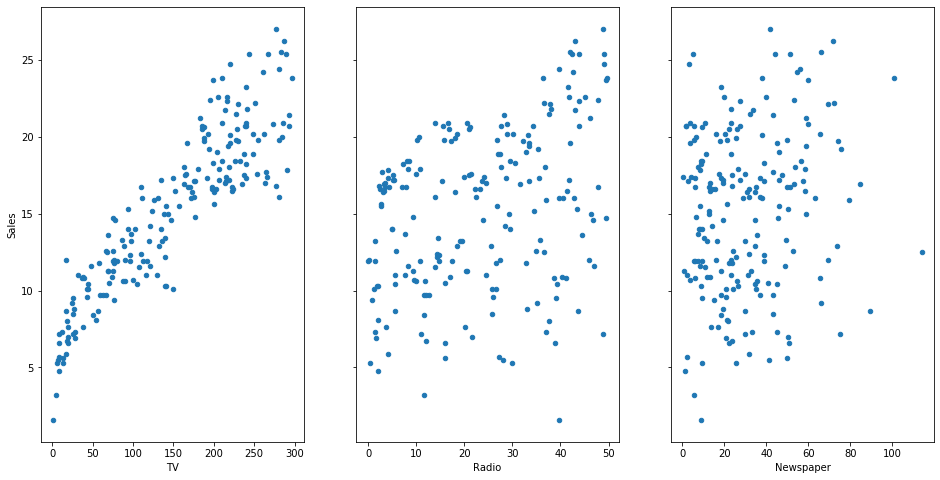

In [13]:
#using scatter plot to visualize the relationship between 2 variables i.e. Sales and TV, Sales & radio, sales & newspaper
fig, axes = plt.subplots(1, 3, sharey=True)
traindata.plot(kind='scatter', x='TV', y='Sales', ax=axes[0], figsize=(16, 8))
traindata.plot(kind='scatter', x='Radio', y='Sales', ax=axes[1])
traindata.plot(kind='scatter', x='Newspaper', y='Sales', ax=axes[2])

In [14]:
traindata.info() 
#gives data type of each column and missing values if any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
traindata.describe()
#descriptive stats on the data

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [16]:
traindata.corr()
#search for multicollinearity in data
#sales n TV highly co-related
#no multicollinearity (linear-relation between independent variables)in data

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


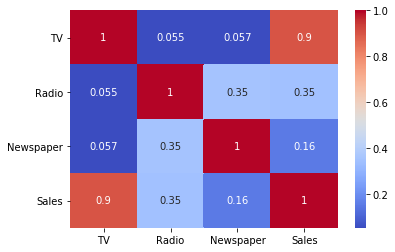

In [17]:
#see as a  plot
sns.heatmap(traindata.corr(),annot=True,cmap="coolwarm")

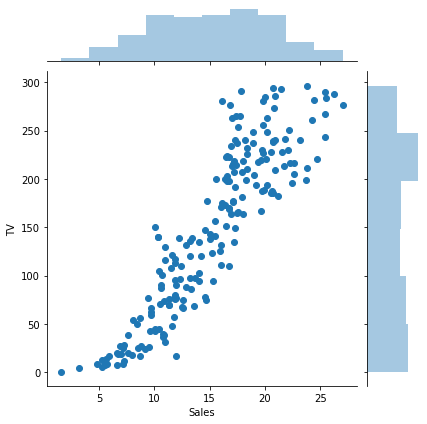

In [19]:
sns.jointplot(x=traindata['Sales'],y=traindata['TV'])

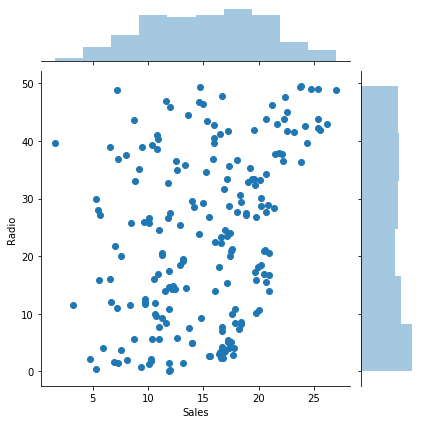

In [20]:
sns.jointplot(x=traindata['Sales'],y=traindata['Radio'])

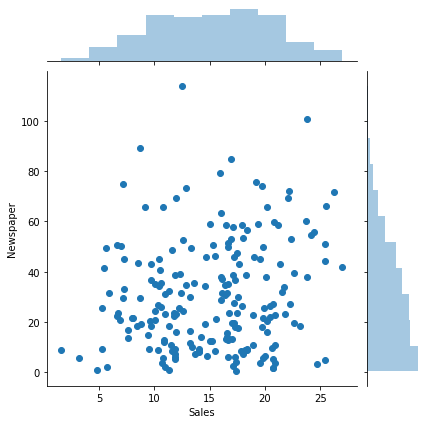

In [21]:
sns.jointplot(x=traindata['Sales'],y=traindata['Newspaper'])

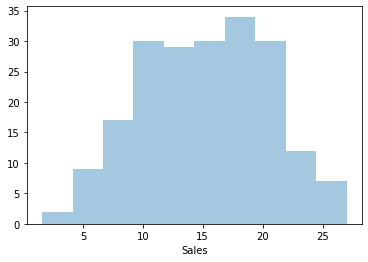

In [36]:
#histogram of Dependent variable  Sales
sns.distplot(traindata['Sales'],kde=False)

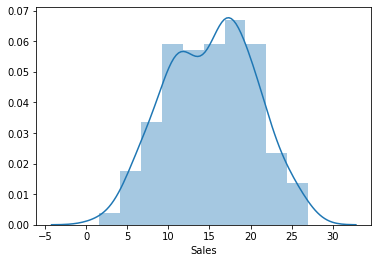

In [35]:
sns.distplot(traindata['Sales'])

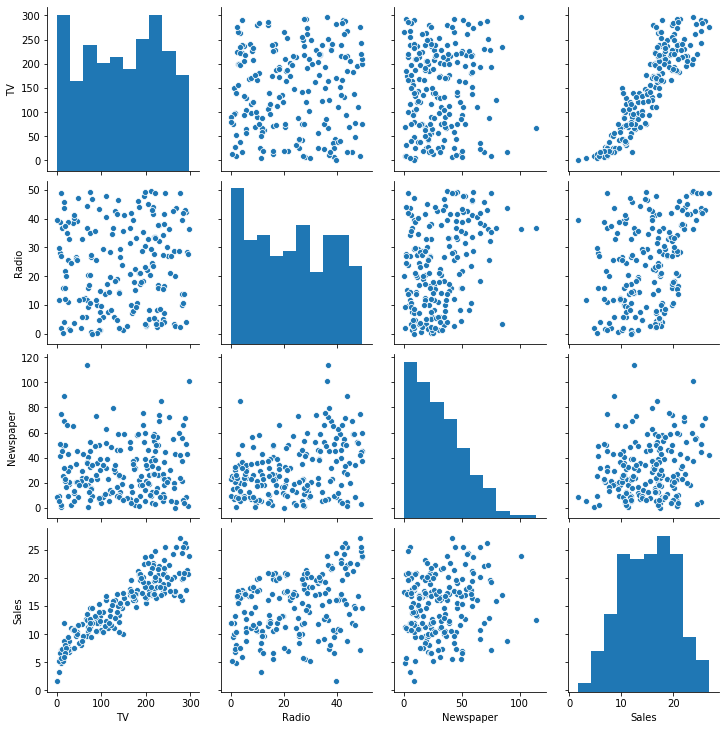

In [30]:
sns.pairplot(traindata)#spends on radio and newpaper is less compared to TV

# 4th step: Building a Linear Regression Model

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
#deCIde the new x and y variables
x=traindata[["TV","Radio","Newspaper"]]
y=traindata["Sales"]

In [77]:
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 1)

In [78]:
from sklearn.linear_model import LinearRegression # import the functions
lm=LinearRegression() #call the function
lm.fit(x_train,y_train)# fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
print(lm.intercept_) # see the intercept
print(lm.coef_)# see the betas
#Now the equation will be 
# Sales = 4.6614 + 0.055*(TV)+ 0.1025*(Radio) -0.0015*(Newspaper)

4.661439720130817
[ 0.05502392  0.10251003 -0.00150711]


# Step 5: Model Evaluation

In [58]:
#lets predict on our test data
from sklearn import metrics
y_pred = lm.predict(x_test)

In [59]:
y_pred[0:4]

array([21.28816103, 18.04213212, 10.0595901 , 21.08224067])

In [60]:
y_test[0:4]

58     23.8
40     16.6
34     11.9
102    19.8
Name: Sales, dtype: float64

In [61]:
# lets see the accuracy score on training data & test data which we need to maximize
lm.score(x_train,y_train)
#we can see the Linear regression model has 89.9% accuracy which is good

0.899374584012456

In [62]:
lm.score(x_test,y_test)
#we can see the Linear regression model has 90.7% accuracy which is good 

0.9071151423684272

In [88]:
#lets predict the sales values using our lm function
lm.predict([[10,40,40]])

#so we can see that the sales are 9.251

array([9.25179576])

In [90]:
#lets predict the values using our lm function
lm.predict([[50,40,40]])

#so we can see that the sales are 11.45 so it means that if we spend more on ads on TV and keep newspaper radio same 
#then the sales increases

#response--->sales
#features--->TV:radio:newspaper

array([11.45275247])

In [93]:
#lets predict the values using our lm function
lm.predict([[50,40,100]])

#so we can see that the sales are 11.36 so it means that if we spend more on ads on newspaper and keep TV radio same 
#then the sales decreases

#response--->sales
#features--->TV:radio:newspaper

array([11.36232615])

In [66]:
#lets see the errors or loss function which we need to minimize
actual=y_test
predicted=y_pred

#actual2 is the array format for y_test (total 30% of 200 = 60 values)
#predicted2 is the array format for y_pred (total 30% of 200 = 60 values)
actual2=np.array(y_test)
predicted2=np.array(predicted)
print (predicted2.shape)
print (actual2.shape)

# SSE sum of squared errors
SSE=sum((actual2-predicted2)**2)
print (SSE)

(60,)
(60,)
142.23959827353943


In [67]:
#RMSE Root Mean Squared Error
RMSE= (SSE/len(x_test))**0.5
print (RMSE)

1.5396947656031235


In [69]:
#Mean Absolute Percentage Error
MAPE= sum(abs((actual2-predicted2)/actual2))
print (MAPE)

#TSS = Total Sum of Squares
TSS= sum((actual2- np.mean(y_test))**2)
print (TSS)

# R2 coefficient of determination or Multiple R2
R2=1-(SSE/TSS)
print (R2)

4.617048473236038
1531.3539999999996
0.9071151423684273


In [70]:
temp=pd.DataFrame({"actual":actual2,
                   "predicted":predicted2})

temp.head()

,actual,predicted
0,23.8,21.288161
1,16.6,18.042132
2,11.9,10.059590
3,19.8,21.082241
4,17.6,20.764760


In [71]:
temp.corr()#gives corelation of all numerical columns in a dataframe

,actual,predicted
actual,1.0000,0.9529
predicted,0.9529,1.0000


In [72]:
#mean squared Error
MSE=metrics.mean_squared_error( y_test, y_pred )
print (MSE)

2.370659971225657


In [84]:
rmse = np.sqrt(MSE)
print (round( rmse, 2 ))

1.54


In [85]:
#calculating R2
print (metrics.r2_score(y_test, y_pred ))

0.9071151423684273


In [97]:
#lets get the P values of each predictors 
from statsmodels.api import add_constant
import statsmodels.api as sm
X2 = add_constant(x_train)
lm1= sm.OLS(y_train,X2)
lm2=lm1.fit()
lm2.pvalues

const        9.911096e-25
TV           2.240607e-66
Radio        1.738611e-17
Newspaper    8.390601e-01
dtype: float64

In [98]:
#to see the overall summary and the P-values of the predictor variables
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     405.2
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           1.36e-67
Time:                        17:17:46   Log-Likelihood:                -272.35
No. Observations:                 140   AIC:                             552.7
Df Residuals:                     136   BIC:                             564.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6614      0.368     12.650      0.0